C:\Users\Sudharshan.A\AppData\Local\Temp\ipykernel_22792\1641537980.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2023-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


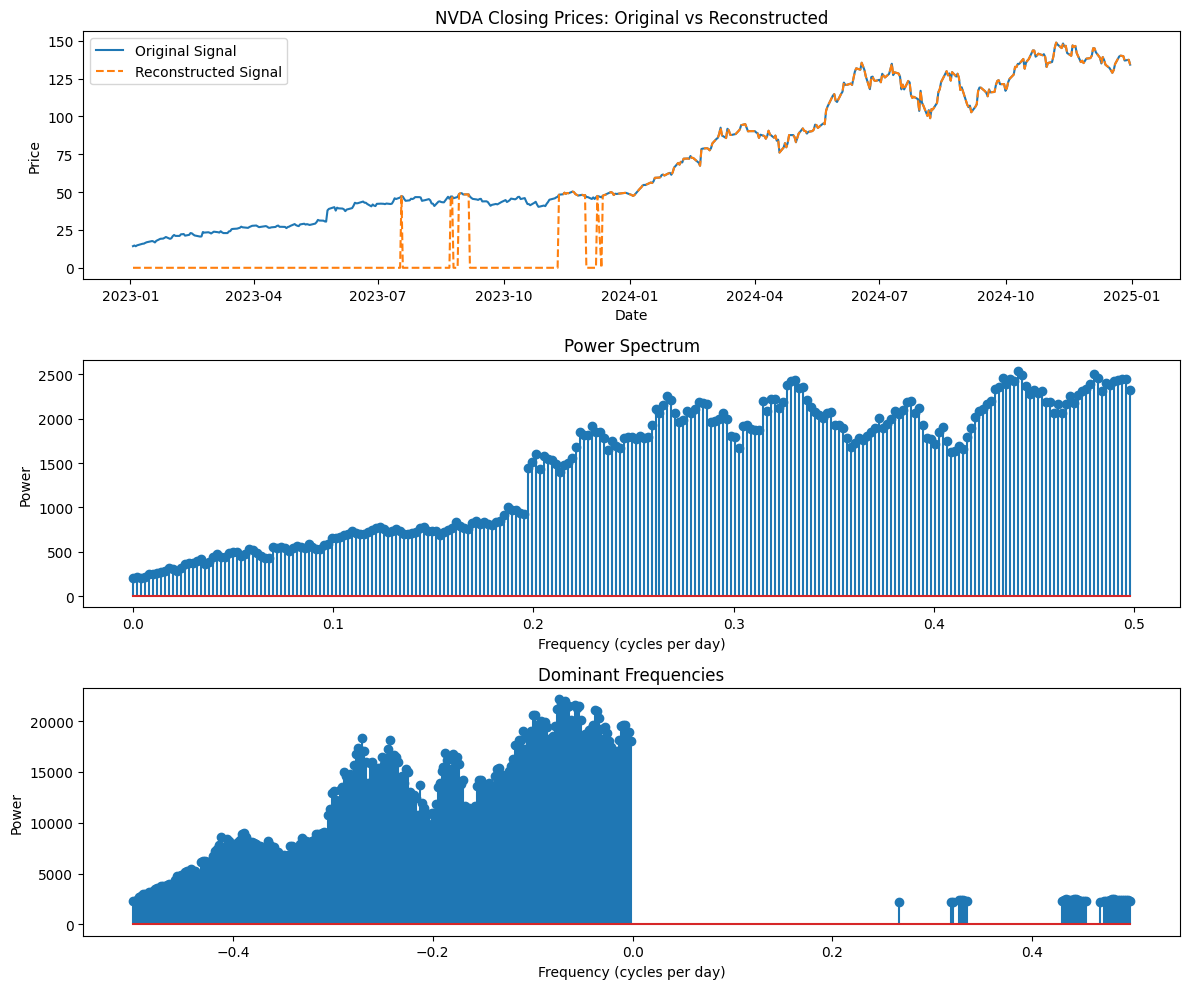

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

ticker = 'NVDA'
data = yf.download(ticker, start='2023-01-01', end='2025-01-01')
closing_prices = data['Close'].values
dates = data.index

fft_result = np.fft.fft(closing_prices)
frequencies = np.fft.fftfreq(len(closing_prices), d=1)
magnitude = np.abs(fft_result)
power_spectrum = magnitude**2

# Ensure arrays are 1D
frequencies = frequencies.flatten()
power_spectrum = power_spectrum.flatten()

# Identify dominant frequencies based on threshold
threshold = max(power_spectrum) * 0.1
mask = power_spectrum > threshold
dominant_freqs = frequencies[mask]
dominant_fft = np.zeros_like(fft_result)
dominant_fft[mask] = fft_result[mask]

# Reconstruct signal from dominant frequencies only
reconstructed_signal = np.fft.ifft(dominant_fft).real

plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(dates, closing_prices, label='Original Signal')
plt.plot(dates, reconstructed_signal, label='Reconstructed Signal', linestyle='--')
plt.title(f'{ticker} Closing Prices: Original vs Reconstructed')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 1, 2)
plt.stem(frequencies[:len(frequencies)//2], power_spectrum[:len(power_spectrum)//2])
plt.title('Power Spectrum')
plt.xlabel('Frequency (cycles per day)')
plt.ylabel('Power')

plt.subplot(3, 1, 3)
plt.stem(dominant_freqs, power_spectrum[mask])
plt.title('Dominant Frequencies')
plt.xlabel('Frequency (cycles per day)')
plt.ylabel('Power')

plt.tight_layout()
plt.show()